#### Step: Sample Data Exploration

Time: 10 min

Goal/Scenario:

Let’s do EDA for a regression, checking all assumptions as we go. Then, students make an OLS model and check remaining assumptions.

Learning Goals in sequence:

Look at relationships between predictors, response variable, and other predictors using VIF, scatterplot matrices, ands marginal plots. Once model is done, check remaining assumptions. Determine if a transformation is needed and, if so, for which variables. Determine whether endogenous variables exist.


In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm

from itertools import combinations
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("Bordeaux.csv")
df.head()

Wine  Price  ParkerPoints  CoatesPoints  P95andAbove  FirstGrowth  \
0      Lafite   2850           100          19.5            1            1   
1      Latour   2850            98          18.5            1            1   
2     Margaux   2900           100          19.5            1            1   
3      Mouton   2500            97          17.0            1            1   
4  Haut Brion   2500            98          18.5            1            1   

   CultWine  Pomerol  VintageSuperstar  
0         0        0                 0  
1         0        0                 0  
2         0        0                 0  
3         0        0                 0  
4         0        0                 0

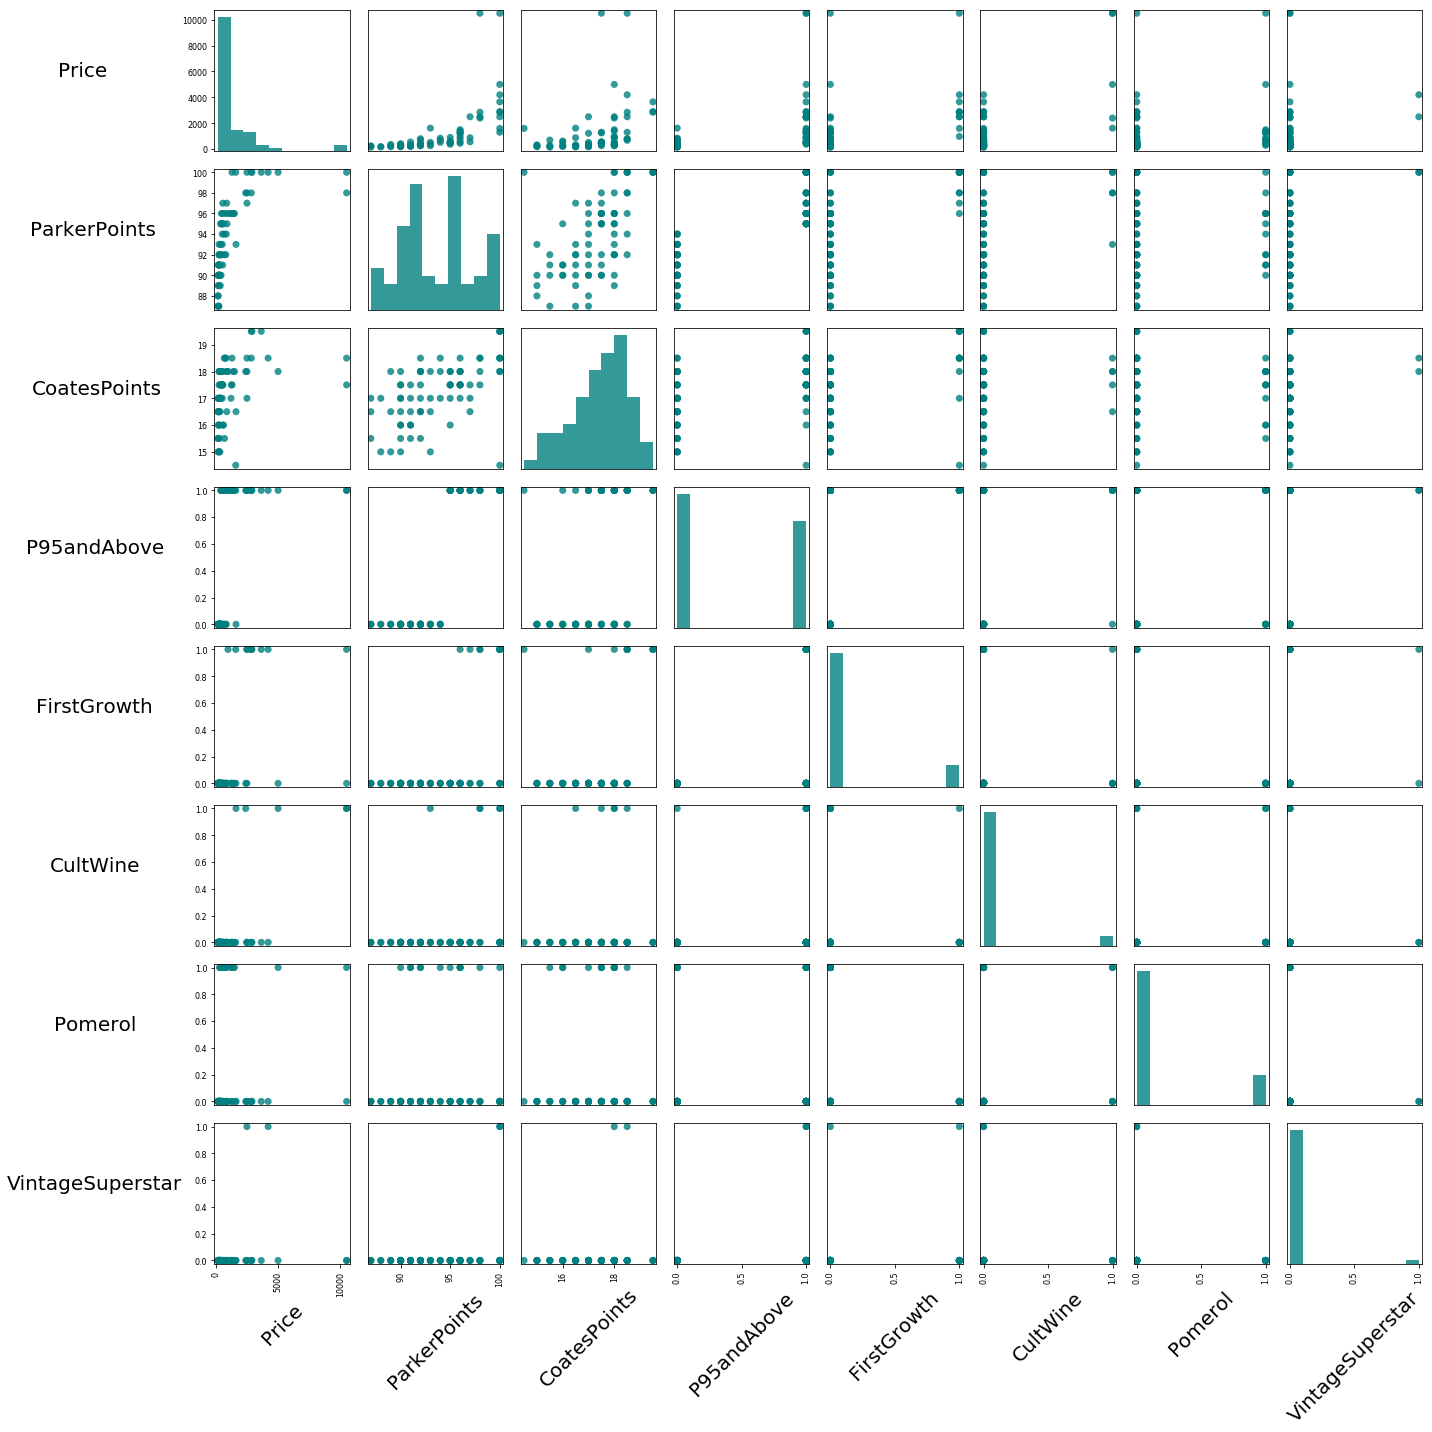

In [3]:
# Scatter Matrix
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(20, 20), 
                                            c='teal', hist_kwds={"color": "teal", "alpha":0.8}, 
                                            grid=True, alpha=0.8, s=200)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0, labelpad=100)
plt.tight_layout()

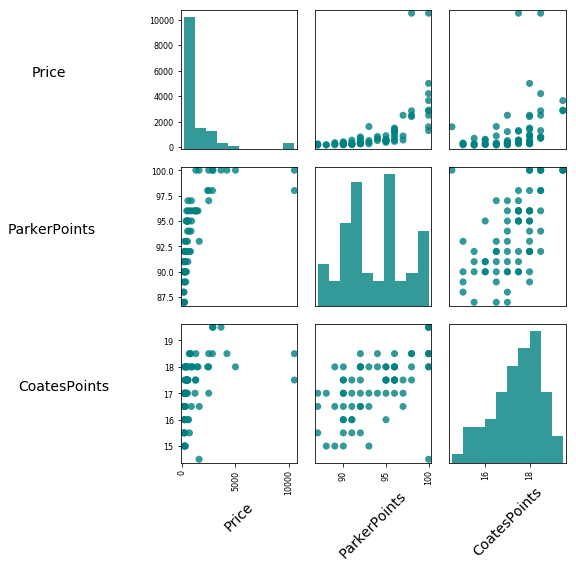

In [4]:
### Let's look at a ScatterMatrix of just the continuous columns with Price
continuous_cols = ["Price", "ParkerPoints", "CoatesPoints"]
scatter_matrix = pd.plotting.scatter_matrix(df[continuous_cols], figsize=(8, 8), 
                                            c='teal', hist_kwds={"color": "teal", "alpha":0.8}, 
                                            grid=True, alpha=0.8, s=200)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 14, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 14, rotation = 0, labelpad=100)
plt.tight_layout()

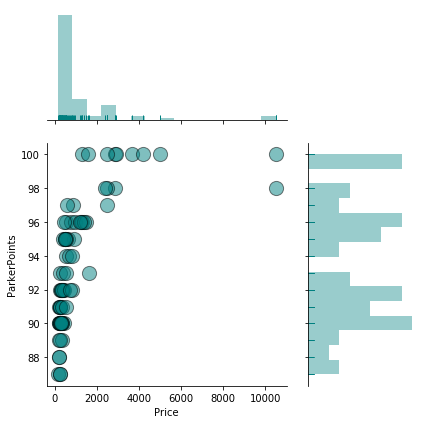

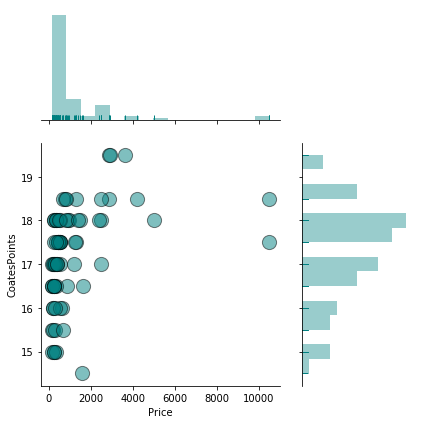

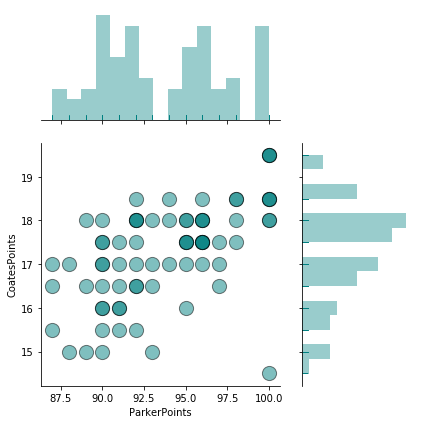

In [5]:
combos = combinations(continuous_cols, 2)
for combo in combos:
    sns.jointplot(x=combo[0], y=combo[1], data=df, kind='scatter', color='teal', s=200, alpha=0.5,
                  edgecolor="black", marginal_kws={"bins":15, "rug":True, "color": "teal"}, ratio=2)
plt.show()

### VIF


In [6]:
df.head()

Wine  Price  ParkerPoints  CoatesPoints  P95andAbove  FirstGrowth  \
0      Lafite   2850           100          19.5            1            1   
1      Latour   2850            98          18.5            1            1   
2     Margaux   2900           100          19.5            1            1   
3      Mouton   2500            97          17.0            1            1   
4  Haut Brion   2500            98          18.5            1            1   

   CultWine  Pomerol  VintageSuperstar  
0         0        0                 0  
1         0        0                 0  
2         0        0                 0  
3         0        0                 0  
4         0        0                 0

In [7]:
features = "+".join(df.drop(axis=1, columns=["Wine", "Price"]).columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('Price ~' + features, df, return_type='dataframe')

In [8]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [9]:
vif

VIF Factor          features
0  3290.597439         Intercept
1     6.070170      ParkerPoints
2     1.443836      CoatesPoints
3     4.078230       P95andAbove
4     1.655775       FirstGrowth
5     1.200133          CultWine
6     1.123699           Pomerol
7     1.148701  VintageSuperstar

### BoxCox
BoxCox: A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

The Box Cox transformation is named after statisticians George Box and Sir David Roxbee Cox who collaborated on a 1964 paper and developed the technique. [[source]](https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/)


#### Step: Box-Cox demonstration, followed by students transforming in small groups

Time: 10 min
-Demo: Transform one or more predictor to normality, give students some variables to transform

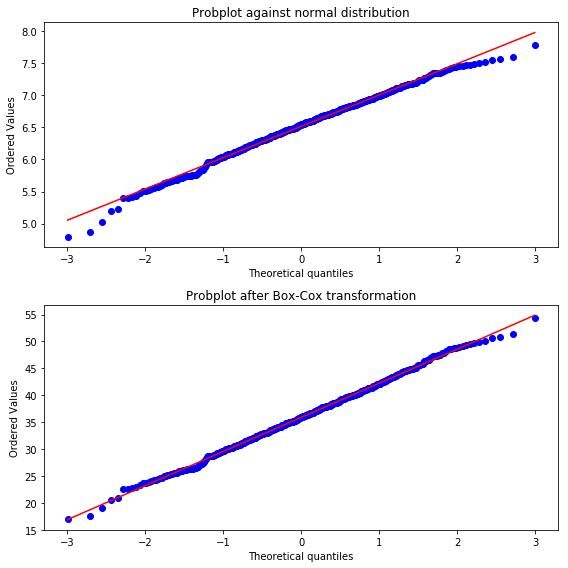

In [10]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x) # Transforming data with boxcox
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.tight_layout()
plt.show()

In [11]:
boxcox = pd.read_csv("boxcoxpractice.csv", usecols=['x1', 'x2', 'x3'])
boxcox.head()

x1        x2         x3
0  5.038660  0.370705  17.053873
1  4.316324  0.073641  11.874907
2  3.640515  0.588711  15.039899
3  4.111693  0.740497  11.570607
4  3.853151  0.176119  14.870509

#### Step: Student Discussion (10 min)

Time: 10 min 

Given four different models to choose from, break into small groups and choose the best one. Create and examine all of the models. Share the reasons for their choice to the main group.

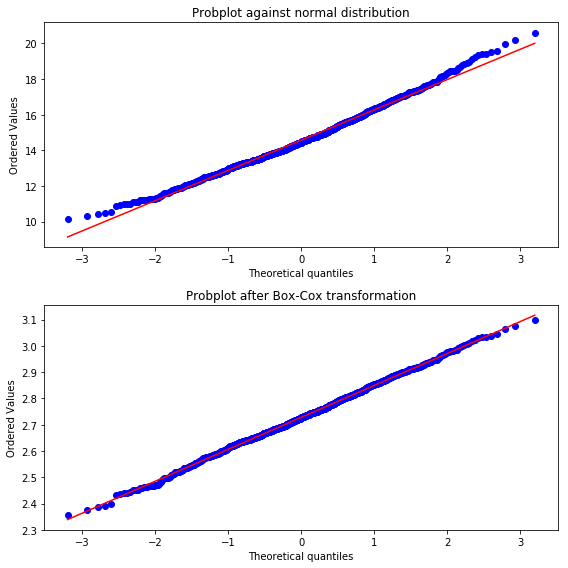

In [12]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
x = boxcox['x3']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x) # Transforming data with boxcox
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.tight_layout()
plt.show()

##### Model Option 1: 
No transformed Variables. Price is predicted by First Growth, Cult Wine, Pomerol, and Vintage Superstar

In [13]:
df.columns

Index(['Wine', 'Price', 'ParkerPoints', 'CoatesPoints', 'P95andAbove',
       'FirstGrowth', 'CultWine', 'Pomerol', 'VintageSuperstar'],
      dtype='object')

In [14]:
import statsmodels.formula.api as smf
formula = 'Price ~ FirstGrowth + CultWine + Pomerol +VintageSuperstar'
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     51.52
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           9.48e-20
Time:                        16:09:26   Log-Likelihood:                -594.06
No. Observations:                  72   AIC:                             1198.
Df Residuals:                      67   BIC:                             1210.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          287.3748    139.352      2.062      0.043       9.227     565.522
FirstGrowth       2497.7561    339.377      7.360      0.000    1820.357    3175.156
CultWine          4864.9435    453.001     10.739      0.000    3960.749    5769.138
Pomerol            880.3262    304.366      2.892      0.005     272.810    1487.843
VintageSuperstar  1813.7471    701.760      2.585      0.012     413.029    3214.465
==============================================================================
Omnibus:                       31.238   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.920
Skew:                           0.702   Prob(JB):                     3.05e-68
Kurtosis:                      13.083   Cond. No.                         6.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model Option 2: 
Log transformed Price is predicted by all variables except for P95 and Vintage Superstar

In [15]:
df['LogPrice'] = df['Price'].map(lambda x: np.log(x))

In [16]:
import statsmodels.formula.api as smf
formula = 'LogPrice ~ ParkerPoints+CoatesPoints+FirstGrowth+CultWine+Pomerol'
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           8.14e-35
Time:                        16:09:26   Log-Likelihood:                -12.040
No. Observations:                  72   AIC:                             36.08
Df Residuals:                      66   BIC:                             49.74
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -9.2417      1.150     -8.038      0.000     -11.537      -6.946
ParkerPoints     0.1467      0.014     10.664      0.000       0.119       0.174
CoatesPoints     0.0957      0.038      2.530      0.014       0.020       0.171
FirstGrowth      0.8264      0.130      6.348      0.000       0.566       1.086
CultWine         1.2742      0.148      8.608      0.000       0.979       1.570
Pomerol          0.5130      0.097      5.313      0.000       0.320       0.706
==============================================================================
Omnibus:                        0.537   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.634
Skew:                           0.190   Prob(JB):                        0.728
Kurtosis:                       2.740   Cond. No.                     3.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Model Option 3: 
LogPrice predicted by Box-Cox transformed Coates Points and all other variables except for P95

In [17]:
len(stats.boxcox(df['CoatesPoints'])[0])

72

In [18]:
df['BCCoatesPoints'] = stats.boxcox(df['CoatesPoints'])[0]

In [19]:
import statsmodels.formula.api as smf
formula = 'LogPrice ~ ParkerPoints+BCCoatesPoints+FirstGrowth+CultWine+Pomerol+VintageSuperstar'
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           3.57e-35
Time:                        16:09:27   Log-Likelihood:                -8.2660
No. Observations:                  72   AIC:                             30.53
Df Residuals:                      65   BIC:                             46.47
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.2818      1.187     -6.134      0.000      -9.653      -4.911
ParkerPoints         0.1369      0.014     10.013      0.000       0.110       0.164
BCCoatesPoints       0.0003      0.000      2.693      0.009    8.09e-05       0.001
FirstGrowth          0.8211      0.125      6.567      0.000       0.571       1.071
CultWine             1.3304      0.143      9.306      0.000       1.045       1.616
Pomerol              0.5367      0.093      5.785      0.000       0.351       0.722
VintageSuperstar     0.5809      0.217      2.674      0.009       0.147       1.015
==============================================================================
Omnibus:                        0.315   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.340
Skew:                           0.149   Prob(JB):                        0.844
Kurtosis:                       2.844   Cond. No.                     6.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Model Option 4: 
Log Price is predicted by transformed Coates, transformed Parker, all others except for P95 and Vintage Superstar

In [20]:
df['BCParkerPoints'] = stats.boxcox(df['ParkerPoints'])[0]

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [21]:
#### SINCE box-cox transforming ParkerPoints failed (it produced a constant),
#### we cannot trust the output of this regression model

# import statsmodels.formula.api as smf
# formula = 'LogPrice ~ BCParkerPoints+BCCoatesPoints+FirstGrowth+CultWine+Pomerol'
# model = smf.ols(formula=formula, data=df).fit()
# model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     60.84
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.35e-21
Time:                        16:09:27   Log-Likelihood:                -47.819
No. Observations:                  72   AIC:                             105.6
Df Residuals:                      67   BIC:                             117.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3439      0.323     13.469      0.000       3.700       4.988
BCParkerPoints     0.3020      0.022     13.469      0.000       0.257       0.347
BCCoatesPoints     0.0009      0.000      4.896      0.000       0.001       0.001
FirstGrowth        1.4873      0.186      7.993      0.000       1.116       1.859
CultWine           1.7547      0.230      7.622      0.000       1.295       2.214
Pomerol            0.6825      0.155      4.393      0.000       0.372       0.993
==============================================================================
Omnibus:                        9.259   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.992
Skew:                           0.737   Prob(JB):                       0.0112
Kurtosis:                       3.908   Cond. No.                     3.58e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Assessment